In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

%matplotlib inline


In [1]:
def plot_mean_and_sdt(t,dataset):
    
    sdt_dataset = []
    mean_dataset = []
    for i in range(len(t)):
        sdt_dataset.append(np.std(dataset[:,i]))
        mean_dataset.append(np.mean(dataset[:,i]))

    Ytempmin =  np.array(mean_dataset) -np.array(sdt_dataset) 
    Ytempmax =  np.array(mean_dataset) +np.array(sdt_dataset) 
    plt.fill_between(t,Ytempmin,Ytempmax, alpha=0.3)
    plt.plot(t,np.array(mean_dataset))
    
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        
def draw_error_ellipses(gmm, ax):
    color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])
    for i, (mean, covar, color) in enumerate(zip(
            gmm.means_, gmm._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        #if not np.any(Y_ == i):
        #    continue
        #plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

    

In [13]:

class Sanitize_records_for_gmm(object):
    """ Merge records data for gmm  
    """
    def __init__(self,dimension=1):
        self.times = []
        self.dimension = dimension
        self.positions = []
        self._X = []
        self.gmm = None
        #self.__x_updated__ = False
    def add_record(self,times,positions):
        if len(times) != len(positions):
            raise Exception("list must have same dimensions")
        # Dirty Sort
        X1 = [i for i in zip (times,positions)]
        X2 = [i for i in zip (self.times,self.positions)]
        X =  sorted(X1+X2)
        self.positions = []
        self.times = []
        for i in X:
            self.times.append(i[0])
            self.positions.append(i[1])
    #def _gen_X(self):
    #    self._XX = np.array([self.times,self.positions]).transpose()
    
    def to_array(self):
        self._X = np.array([self.times,self.positions]).transpose()
        return self._X
    
    def plot(self,ax=None):
        X = self.to_array()
        if ax is None:
            plt.scatter(X[:,0],X[:,1])
        else :
            ax.scatter(X[:,0],X[:,1])
    
    def gen_gmm(self):
        X = self.to_array()
        title = 'Expectation-maximization'
        self.gmm = mixture.GMM(n_components=4, covariance_type='full', n_iter=100)
        self.gmm.fit(X)
        return self.gmm
    
    def plot_gmm(self,ax=None):
        color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])
        self.gen_gmm()
        Y_ = self.gmm.predict(self._X)
        if ax is None:
            ax = plt.subplot(1,1,1)

        for i, (mean, covar, color) in enumerate(zip(
                self.gmm.means_, self.gmm._get_covars(), color_iter)):
                ## valeur propre, vecteur propre
                v, w = linalg.eigh(covar)
                u = w[0] / linalg.norm(w[0])
                # as the DP will not use every component it has access to
                # unless it needs it, we shouldn't plot the redundant
                # components.
                if not np.any(Y_ == i):
                    continue
                ax.scatter(self._X[Y_ == i, 0], self._X[Y_ == i, 1], .8, color=color)

                # Plot an ellipse to show the Gaussian component
                angle = np.arctan(u[1] / u[0])
                angle = 180 * angle / np.pi  # convert to degrees
                ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
                ell.set_clip_box(ax.bbox)
                ell.set_alpha(0.5)
                ax.add_artist(ell)
    
    
        
    
        
    
    

array([ 0.])

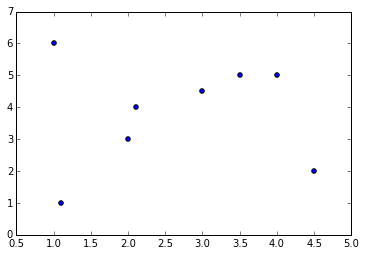

In [178]:
t1=[1,2,3,4]
t2=[1.1,2.1,3.5,4.5]
x1=[6,3,4.5,5]
x2=[1,4,5,2]

datas = Sanitize_records_for_gmm()
datas.add_record(t1,x1)
datas.add_record(t2,x2)
datas.plot()
X = np.zeros(1)
X

## 1 motor multiple demo of sinus

[[  0.00000000e+00   0.00000000e+00]
 [  9.04197577e-02  -6.65334555e+01]
 [  1.00502513e-01   1.48772757e+00]
 ..., 
 [  2.01316866e+01  -1.04806895e+02]
 [  2.01423028e+01  -1.04826914e+02]
 [  2.03995072e+01  -1.05186837e+02]]


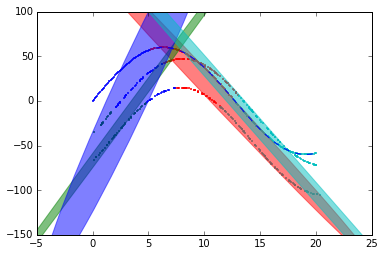

In [23]:
# number of demos
ndemo = 2

# number of periods
nperiod = np.pi/4

# motor specific
pmin = -60
pmax = 60

# record parameter
framerate = 10
tmin = 0
tmax = 20

# noise parameter
noise_amplitude =  0.2*(pmax-pmin) #30
noise_phase = np.pi/5#1.3
noise_time = 0.7#0.5


datas = Sanitize_records_for_gmm()


def _rand():
    return 2*(np.random.random(1)-1)

t=np.linspace(tmin,tmax,(tmax-tmin)*framerate)
y = ((pmax-pmin)/2)*np.sin(t*2*np.pi*nperiod/tmax) + (pmax+pmin)/2
datas.add_record(t,y)
mot_data = []
for i in xrange(ndemo):
    noisy_t =np.zeros(len(t))
    for n in range(len(t)):
        noisy_t[n] = t[n]+noise_time*np.random.random()
    y_noisy = (noise_amplitude*_rand())+ ((pmax-pmin)/2)*np.sin((noisy_t*2*np.pi*nperiod/tmax)+noise_phase*_rand()) + (pmax+pmin)/2
    mot_data.append(y_noisy)
    datas.add_record(noisy_t,y_noisy)

    #plt.plot(t,y_noisy)

# mot = 
#f, axes = plt.subplots(ndemo, 1)

#for i in range(ndemo):
#    axes[i].plot(mot_data[i])

datas.plot_gmm()
print datas._X
plt.plot(t,y,'--')


#plot_mean_and_sdt(t,np.array(mot_data))


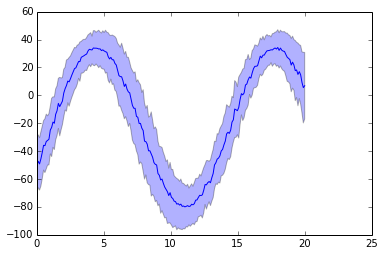

In [7]:
plot_mean_and_sdt(t,np.array(mot_data))


sklearn.mixture.gmm.GMM

In [182]:

#from sklearn.externals.six.moves import xrange

# Number of samples per component
n_samples = 70

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))

step = 4 * np.pi / n_samples

for i in xrange(X.shape[0]):
    x = i * step - 6
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3 * (np.sin(x) + np.random.normal(0, .2))



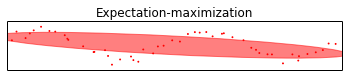

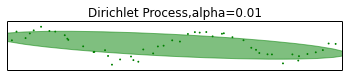

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:30: RuntimeWarning: divide by zero encountered in double_scalars


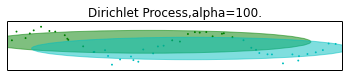

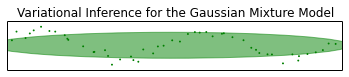

In [17]:
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])


for i, (clf, title) in enumerate([
        (mixture.GMM(n_components=1, covariance_type='full', n_iter=100),
         "Expectation-maximization"),
        (mixture.DPGMM(n_components=10, covariance_type='full', alpha=0.01,
                       n_iter=100),
         "Dirichlet Process,alpha=0.01"),
        (mixture.DPGMM(n_components=10, covariance_type='diag', alpha=100.,
                       n_iter=100),
         "Dirichlet Process,alpha=100."),
        (mixture.VBGMM(n_components=1, covariance_type='diag',n_iter=100),
         "Variational Inference for the Gaussian Mixture Model")]):
    
    clf.fit(X)
    splot = plt.subplot(4, 1, 1 + i)
    Y_ = clf.predict(X)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)


    plt.xlim(-6, 4 * np.pi - 6)
    plt.ylim(-5, 5)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

([], <a list of 0 Text yticklabel objects>)

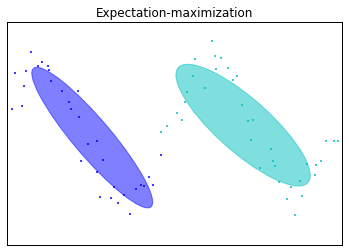

In [186]:
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])

title = 'Expectation-maximization'
clf = mixture.VBGMM(n_components=4, covariance_type='full', n_iter=100)
clf.fit(X)
Y_ = clf.predict(X)
splot = plt.subplot(1,1,1)

for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        ## valeur propre, vecteur propre
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

plt.xlim(-6, 4 * np.pi - 6)
plt.ylim(-5, 5)
plt.title(title)
plt.xticks(())
plt.yticks(())
 



In [24]:
Y_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])